<a href="https://colab.research.google.com/github/ManideepAnnarapu/Health-Insurance-Claims-Prediction/blob/main/Health_Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ARDRegression, TweedieRegressor, HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option('display.float_format',lambda x: '%.3f' % x)

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ManideepAnnarapu/Health-Insurance-Claims-Prediction/main/health_insurance.csv')
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.000,male,64,24.300,NoDisease,1,0,NewYork,72,0,0,Actor,13112.600
1,49.000,female,75,22.600,NoDisease,1,0,Boston,78,1,1,Engineer,9567.000
2,32.000,female,64,17.800,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.200
3,61.000,female,53,36.400,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.600
4,19.000,female,50,20.600,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.700


In [5]:
df.shape

(15000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [7]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000,15000.000,14044.000,15000.000,15000.000,15000.000,15000.000,15000.000,15000.000
mean,39.548,64.910,30.266,1.130,0.198,68.650,0.777,0.224,13401.438
std,14.016,13.702,6.123,1.228,0.399,19.419,0.416,0.417,12148.240
min,18.000,34.000,16.000,0.000,0.000,0.000,0.000,0.000,1121.900
25%,27.000,54.000,25.700,0.000,0.000,64.000,1.000,0.000,4846.900
50%,40.000,63.000,29.400,1.000,0.000,71.000,1.000,0.000,9545.650
75%,52.000,76.000,34.400,2.000,0.000,80.000,1.000,0.000,16519.125
max,64.000,95.000,53.100,5.000,1.000,122.000,1.000,1.000,63770.400


In [8]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df['age'].fillna(df['age'].mode()[0],inplace=True)

In [9]:
df.isnull().sum()

,0
age,0
sex,0
weight,0
bmi,0
hereditary_diseases,0
no_of_dependents,0
smoker,0
city,0
bloodpressure,0
diabetes,0


In [10]:
df[df.duplicated()]

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
605,46.000,female,68,30.266,NoDisease,2,0,LosAngeles,60,1,0,Dancer,8825.100
608,27.000,female,82,30.266,NoDisease,3,0,Oceanside,82,1,1,Architect,18804.800
898,48.000,female,67,33.100,Alzheimer,0,1,Cincinnati,70,1,0,ITProfessional,40974.200
919,26.000,male,56,23.700,NoDisease,2,0,Kingman,72,1,0,HomeMakers,3484.300
970,48.000,female,70,28.900,NoDisease,1,0,KanasCity,72,0,0,Architect,9249.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14966,46.000,male,46,22.300,NoDisease,0,0,Louisville,72,1,0,Academician,7147.100
14971,18.000,female,53,27.300,NoDisease,3,1,Boston,85,1,0,Student,18223.500
14987,47.000,male,94,47.500,NoDisease,1,0,Raleigh,61,1,0,Academician,8083.900
14989,44.000,male,90,38.100,NoDisease,1,0,Georgia,76,1,0,Engineer,7152.700


In [11]:
df['hereditary_diseases'].unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [12]:
df['city'].nunique()

91

In [13]:
df['job_title'].value_counts().head()

,count
job_title,
Student,1320
HomeMakers,972
Singer,744
Actor,720
FilmMaker,714


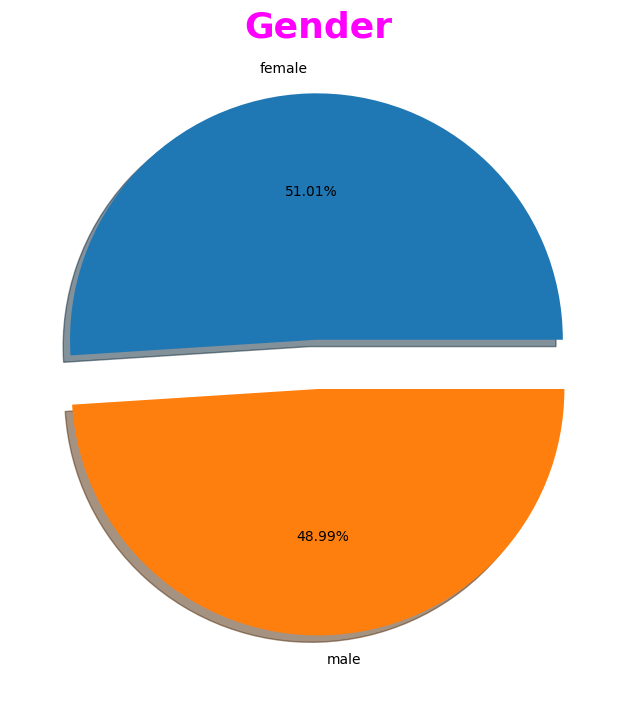

In [14]:
values = df.sex.value_counts().values
labels = ['female','male']
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
plt.title('Gender',pad=32,fontsize=26,fontweight='bold',color='fuchsia')
plt.show()

The population of both genders is almost equally balanced in the dataset.

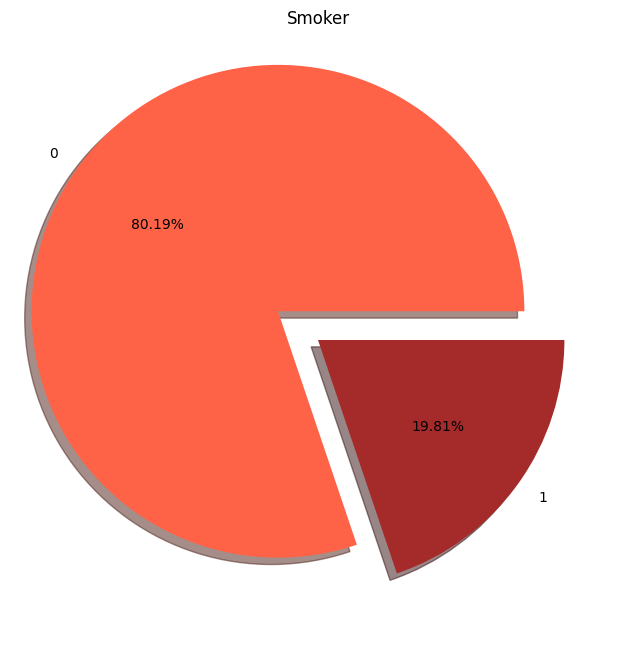

In [15]:
values = df.smoker.value_counts().values
labels = df.smoker.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['tomato','brown'])
plt.title('Smoker')
plt.show()

A significant proportion of the individuals in the dataset are non-smokers.

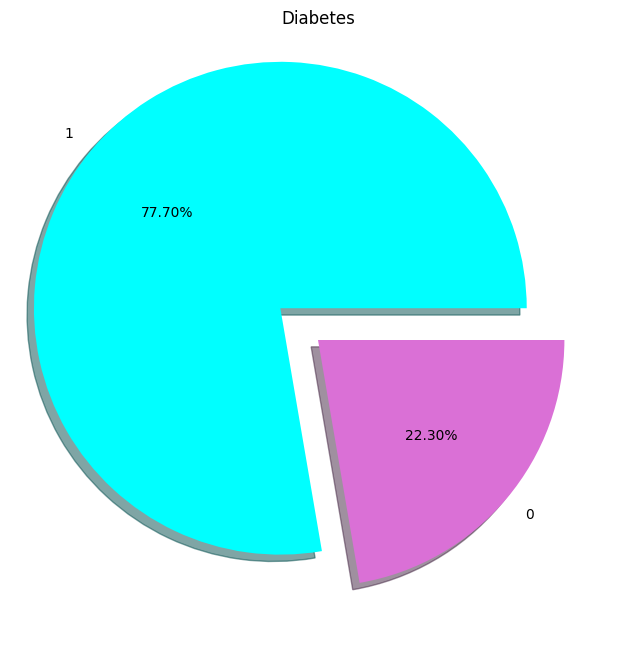

In [16]:
values = df.diabetes.value_counts().values
labels = df.diabetes.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['aqua','orchid'])
plt.title('Diabetes')
plt.show()

A vast majority of the population in the dataset is suffering from diabetes disease.

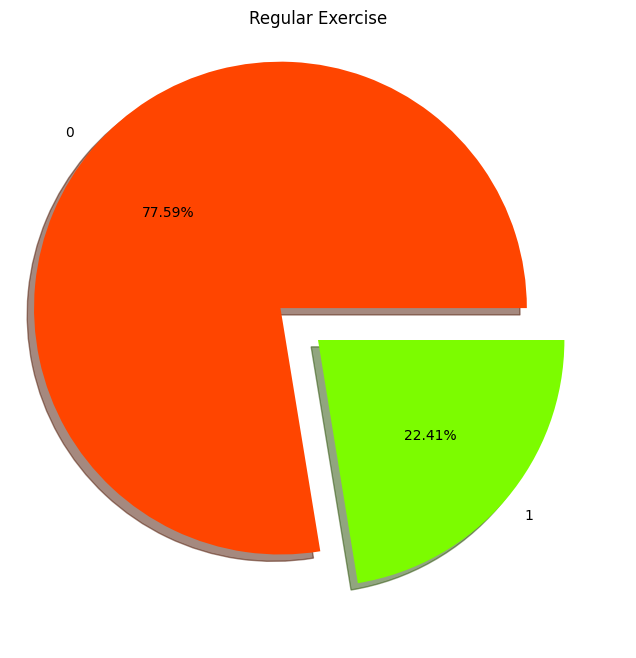

In [17]:
values = df.regular_ex.value_counts().values
labels = df.regular_ex.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['orangered','lawngreen'])
plt.title('Regular Exercise')
plt.show()

Most of the people in the dataset do not exercise regularly.

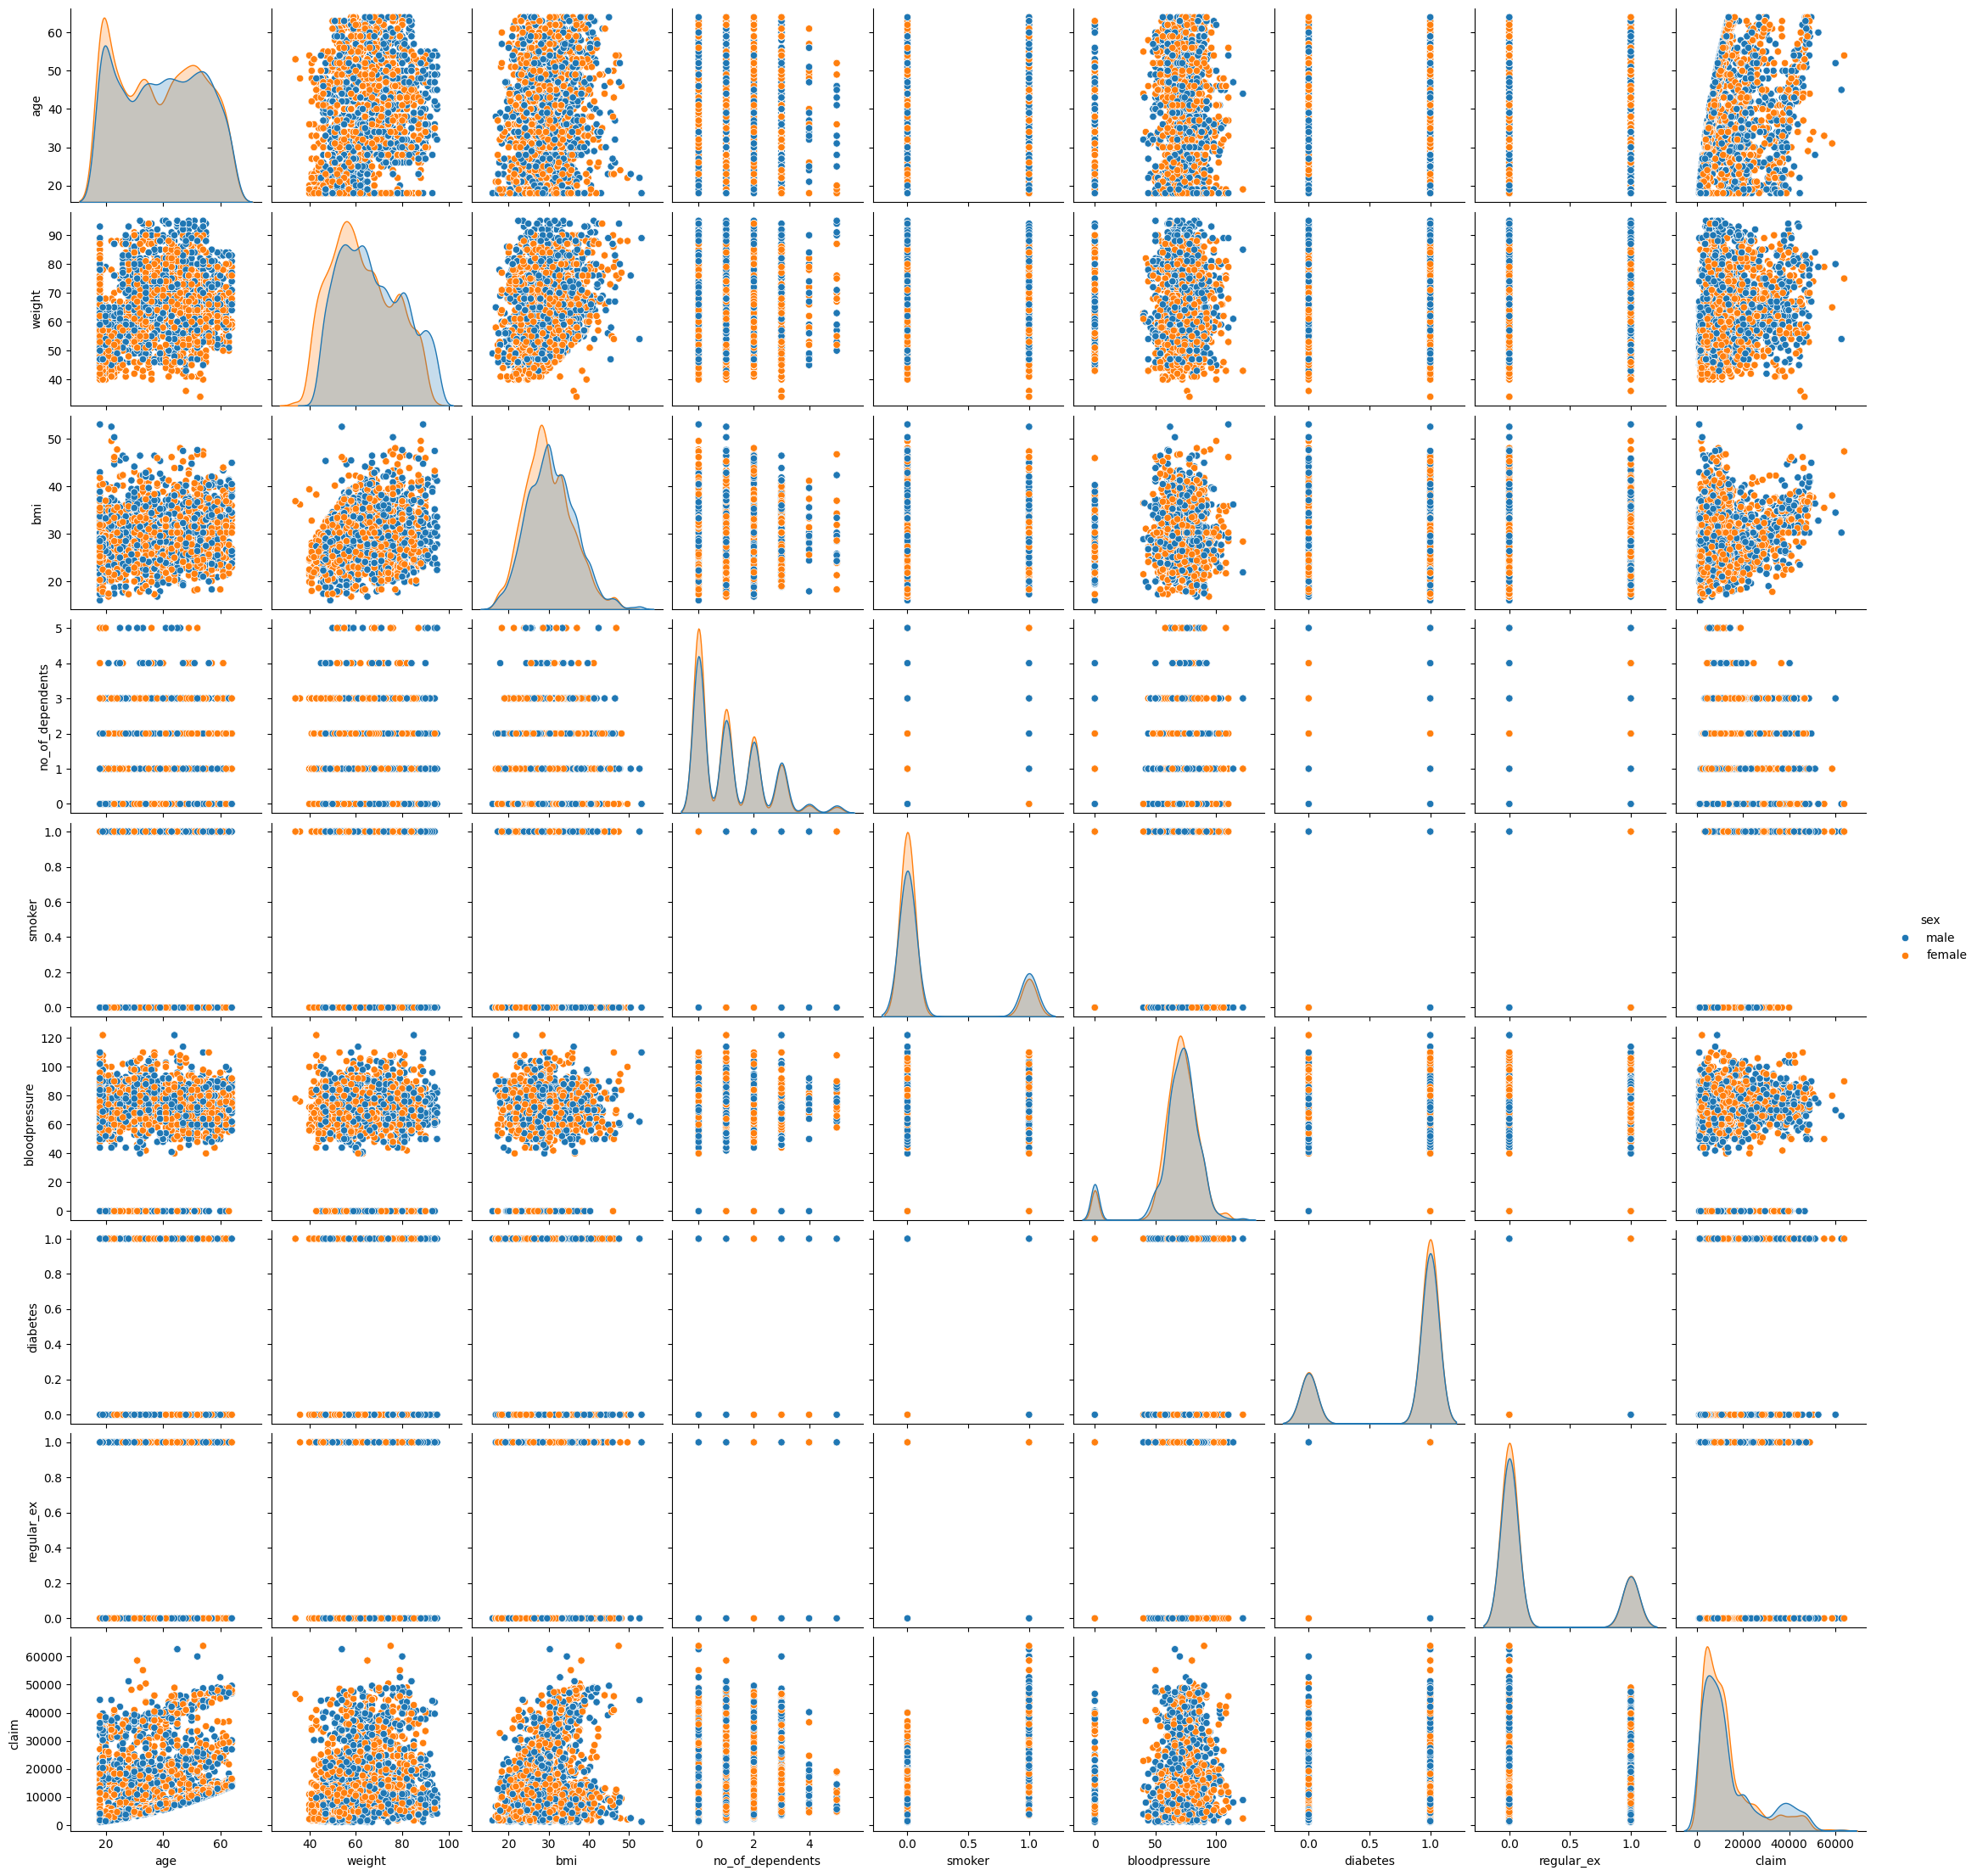

In [18]:
sns.pairplot(df,hue='sex')

There is signficantly higher positive correlation between the variables smoker and claim. It indicates that smoker can be a crucial predictor variable for insurance claim.

In [21]:
job_titles_bmi = df.groupby('job_title')['bmi'].mean().sort_values(ascending=False).reset_index()[:10]
job_titles_bmi

,job_title,bmi
0,CA,32.375
1,ITProfessional,32.063
2,Analyst,31.910
3,Technician,31.579
4,Manager,31.530
5,Politician,31.469
6,Buisnessman,31.208
7,HouseKeeper,31.197
8,Clerks,31.181
9,FilmDirector,31.113


<Axes: xlabel='bmi', ylabel='job_title'>

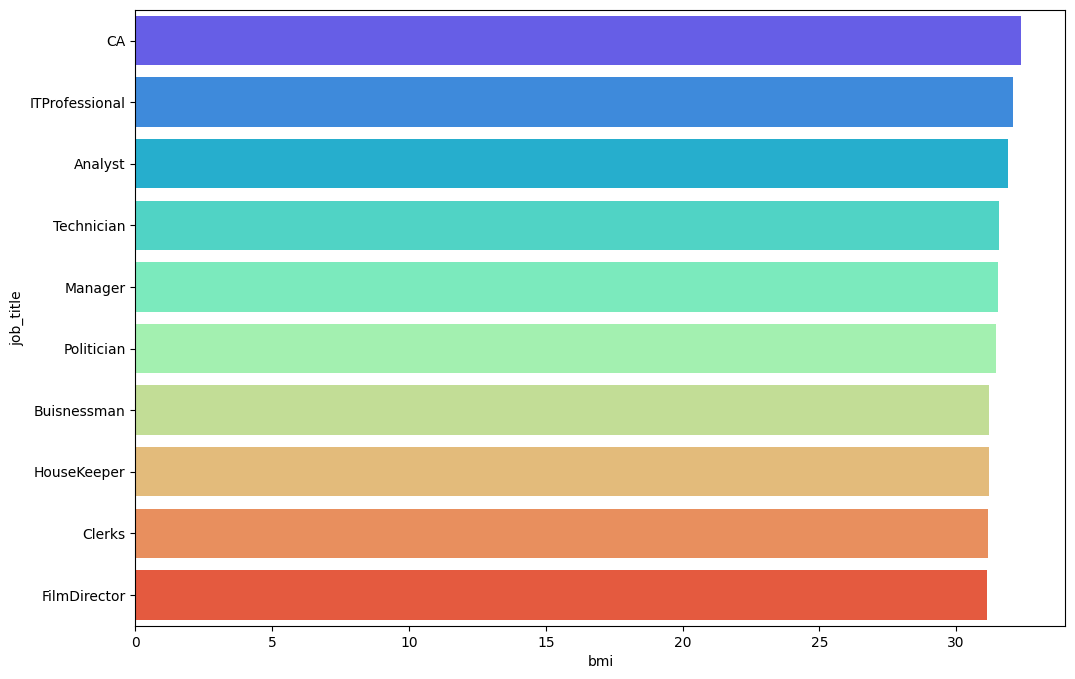

In [22]:
sns.barplot(x='bmi',y='job_title',data=job_titles_bmi,palette='rainbow',orient='horizontal')

At an average, a CA has the largest BMI value among all professionals.

In [23]:
job_titles_bmi = df.groupby('job_title')['bmi'].max().sort_values(ascending=False).reset_index()[:10]
job_titles_bmi

,job_title,bmi
0,GovEmployee,53.100
1,Photographer,52.600
2,Student,50.400
3,Accountant,49.600
4,Blogger,48.100
5,Politician,47.700
6,Academician,47.500
7,Chef,46.800
8,CA,46.700
9,Dancer,46.500


Text(0.5, 1.0, 'Job professionals with highest BMI')

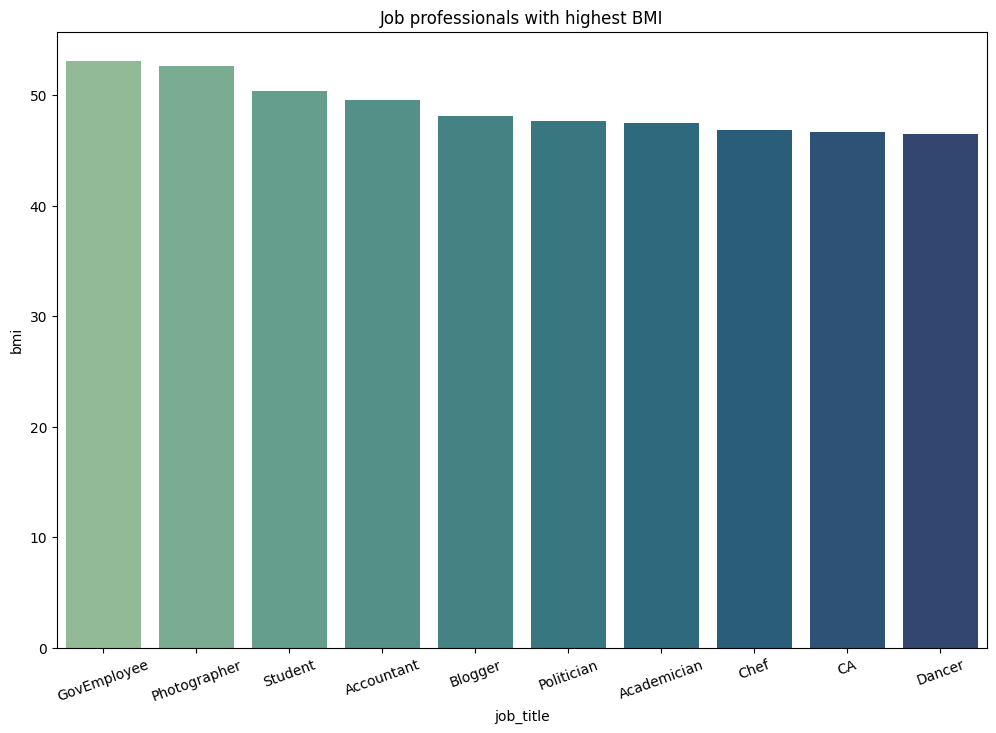

In [24]:
sns.barplot(x='job_title',y='bmi',data=job_titles_bmi,palette='crest')
plt.xticks(rotation=20)
plt.title('Job professionals with highest BMI')

A government employee has the highest BMI value, closely followed by a photographer.

In [25]:
job_titles_bmi = job_titles_bmi = df.groupby('job_title')['bmi'].min().sort_values().reset_index()[:10]
job_titles_bmi

,job_title,bmi
0,Student,16.000
1,Accountant,16.800
2,Lawyer,16.800
3,GovEmployee,17.300
4,Manager,17.300
5,HomeMakers,17.400
6,Actor,17.400
7,Singer,17.700
8,Dancer,17.800
9,Academician,17.800


<Axes: xlabel='job_title', ylabel='bmi'>

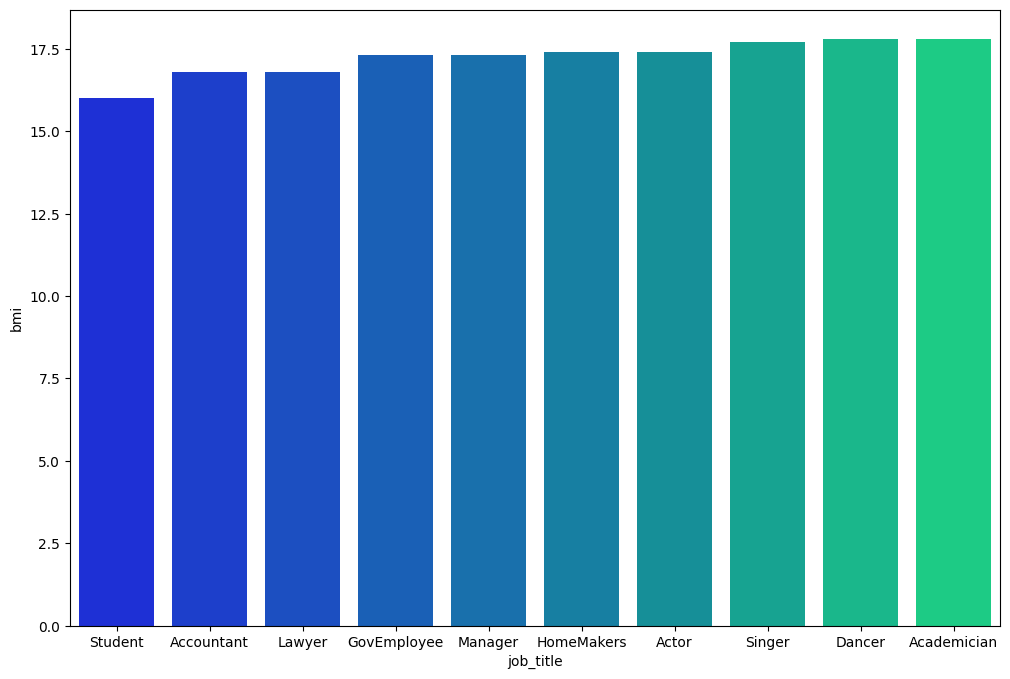

In [26]:
sns.barplot(x='job_title',y='bmi',data=job_titles_bmi,palette='winter')

A student has the lowest BMI among all professionals.

<Figure size 2000x1000 with 0 Axes>

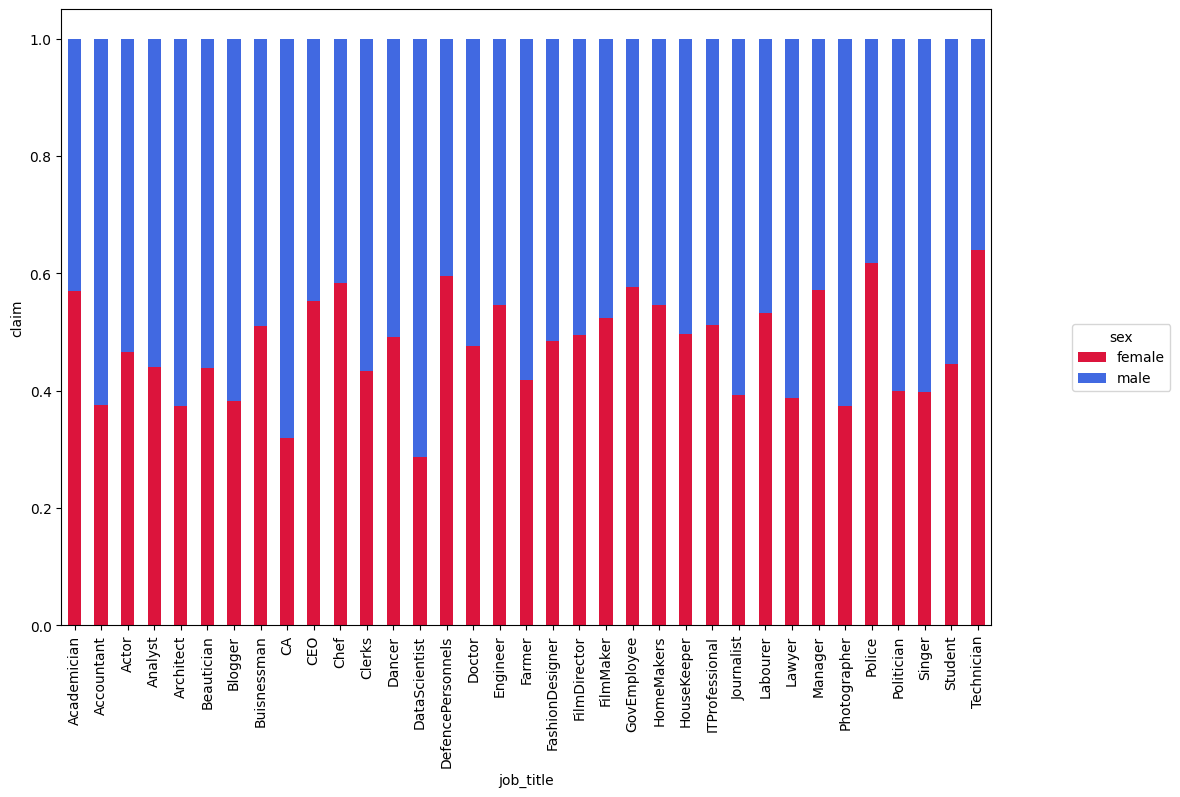

In [27]:
plt.figure(figsize=(20,10))
pd.crosstab(index=df.job_title,columns=df.sex,values=df.claim,normalize='index',aggfunc='mean').plot.bar(stacked=True,color=['crimson','royalblue'])
plt.ylabel('claim')
plt.legend(bbox_to_anchor=(1.2,0.5),title='sex')

Among females, the technician job is the most esteemed possessing the highest insurance claim whereas among males, the data scientist position has the highest insurance claim.

<Axes: xlabel='count', ylabel='hereditary_diseases'>

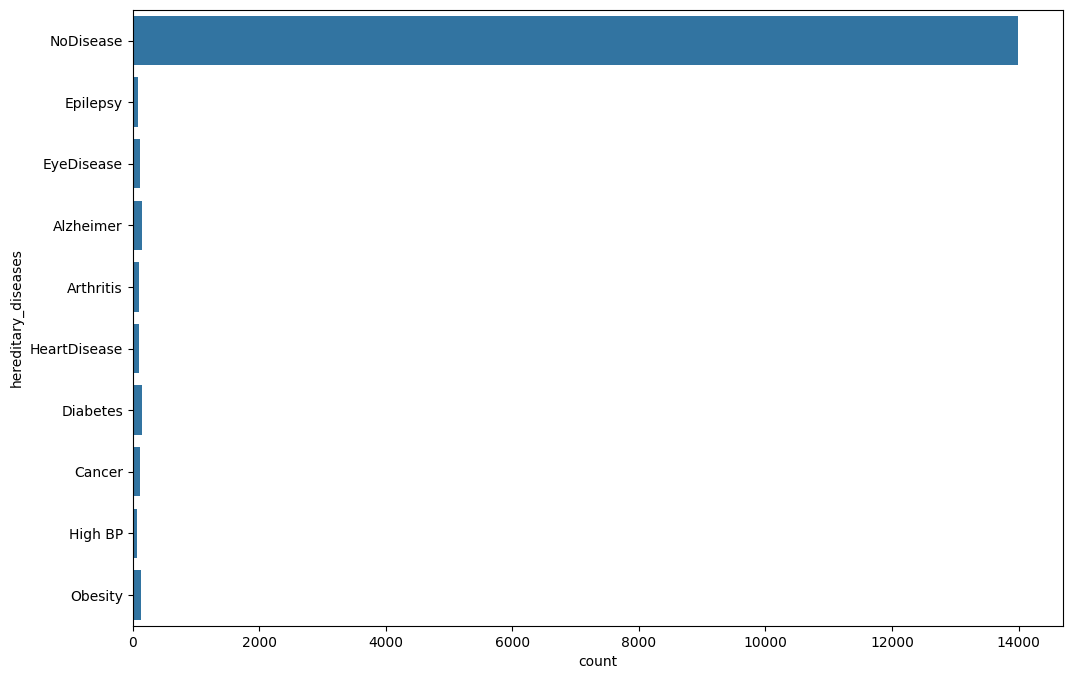

In [28]:
sns.countplot(df.hereditary_diseases)

Majority of the population in the dataset do not have any hereditary diseases.

<Figure size 2000x1000 with 0 Axes>

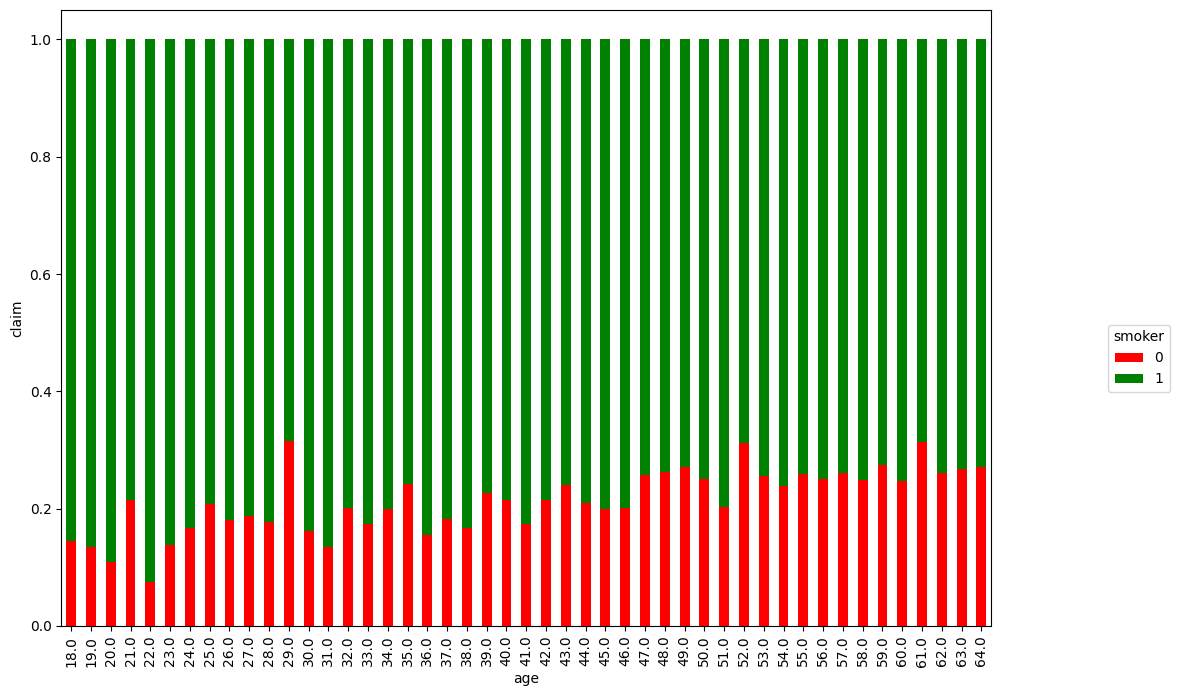

In [29]:
plt.figure(figsize=(20,10))
pd.crosstab(index=df.age,columns=df.smoker,values=df.claim,aggfunc='mean',normalize='index').plot.bar(stacked=True,color=['red','green'])
plt.ylabel('claim')
plt.legend(bbox_to_anchor=(1.2,0.5),title='smoker')

As far as the non-smokers are concerned, people of ages 29 and 52 have the highest insurance claims while among smokers, young adults having an age of 22 possess the largest insurance claim across the whole population.

<Axes: ylabel='claim'>

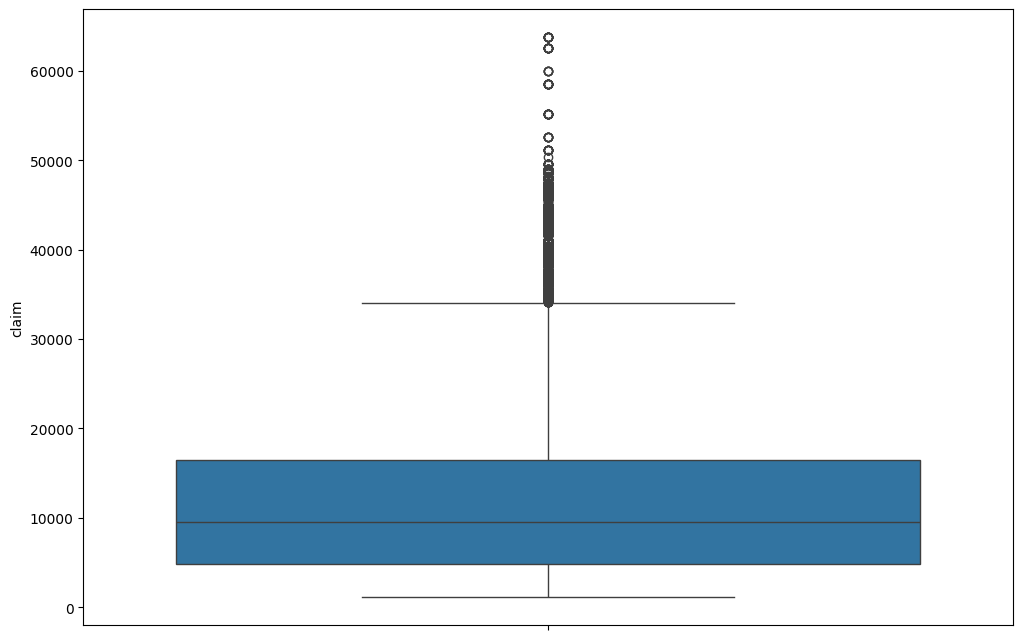

In [30]:
sns.boxplot(df.claim)

There are some outliers in the overall distribution of insurance claim variable.

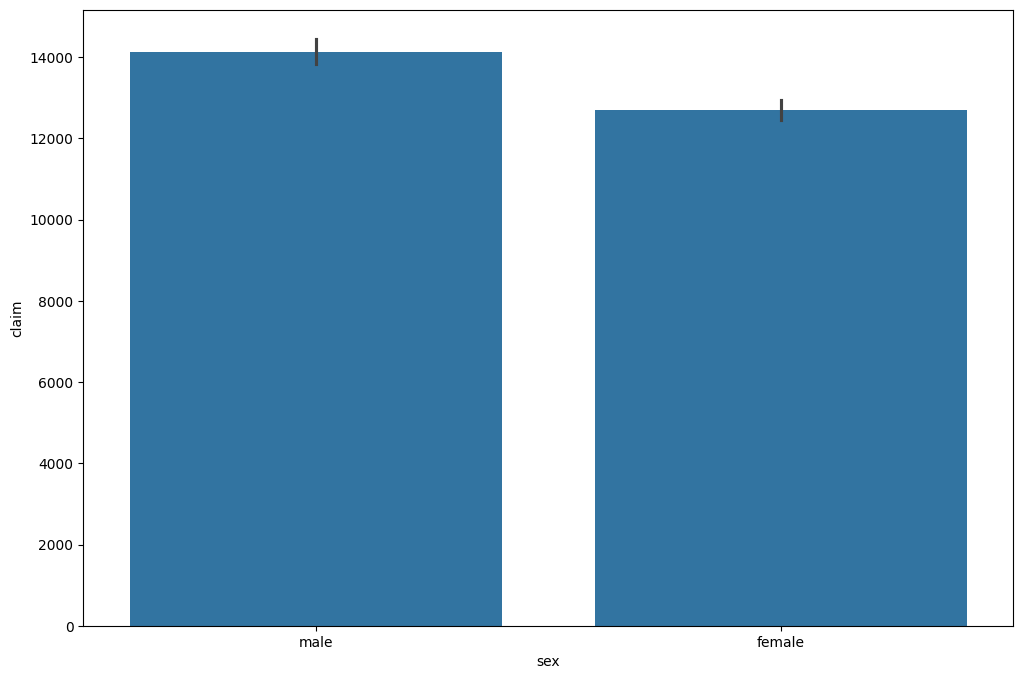

In [31]:
ax = sns.barplot(x='sex',y='claim',data=df)

In general, males have higher insurance claim in comparison to females.

<Axes: xlabel='smoker', ylabel='claim'>

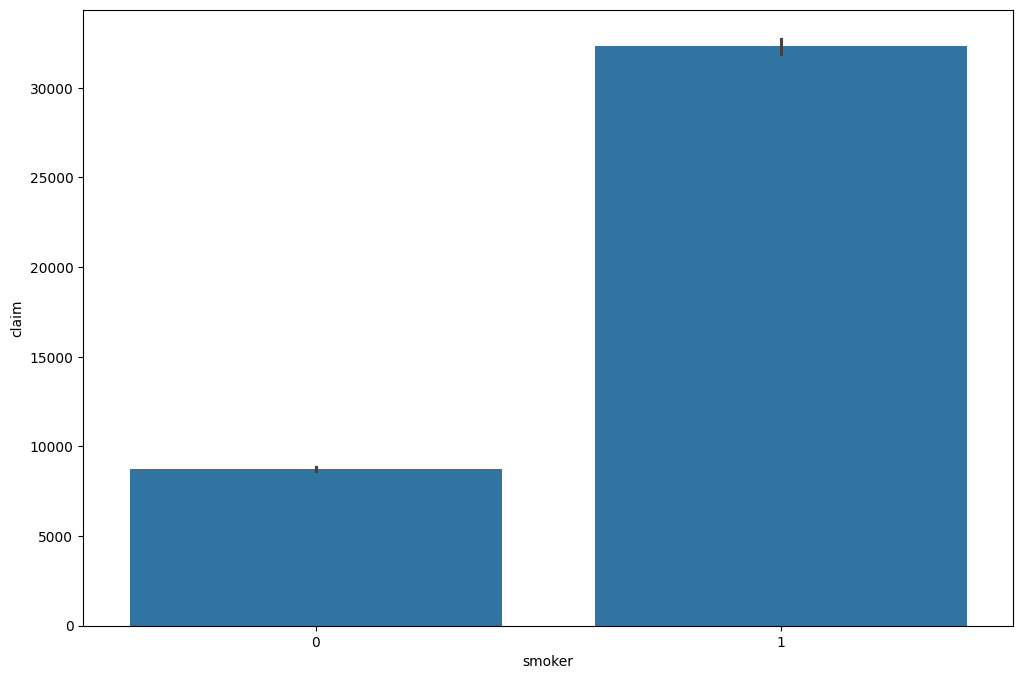

In [32]:
sns.barplot(x='smoker',y='claim',data=df)

Surprisingly, smokers have higher insurance claims as compared to non-smokers.

<Axes: xlabel='regular_ex', ylabel='claim'>

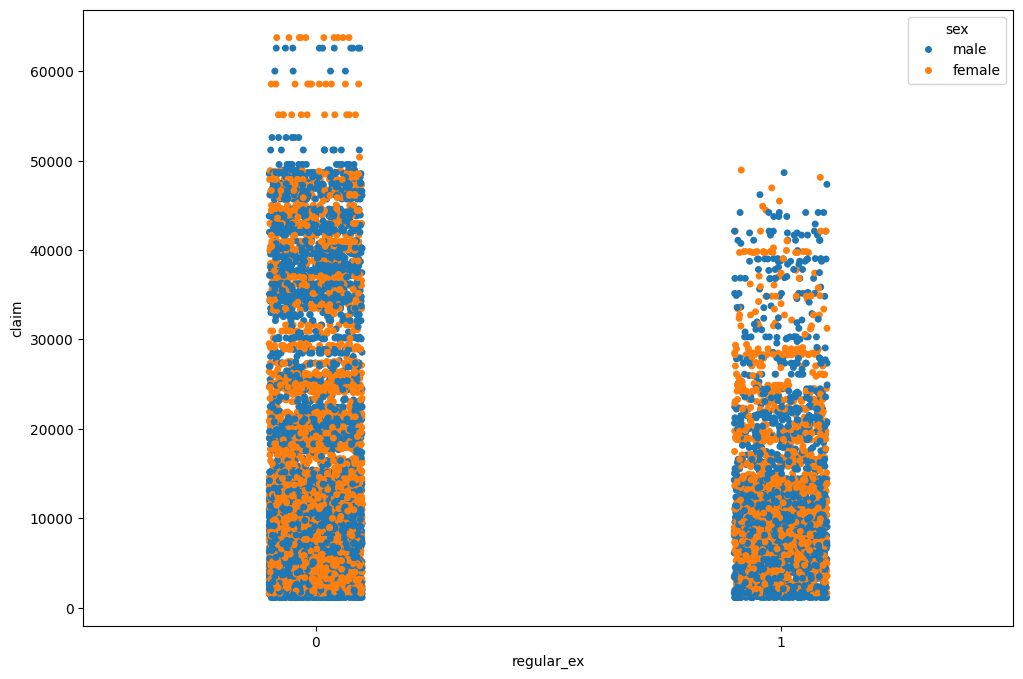

In [33]:
sns.stripplot(x='regular_ex',y='claim',data=df,hue='sex')

Astoundingly, people who don't do regular exercises have larger insurance claims as compared to those who do exercise consistently everyday.

<Axes: xlabel='diabetes', ylabel='claim'>

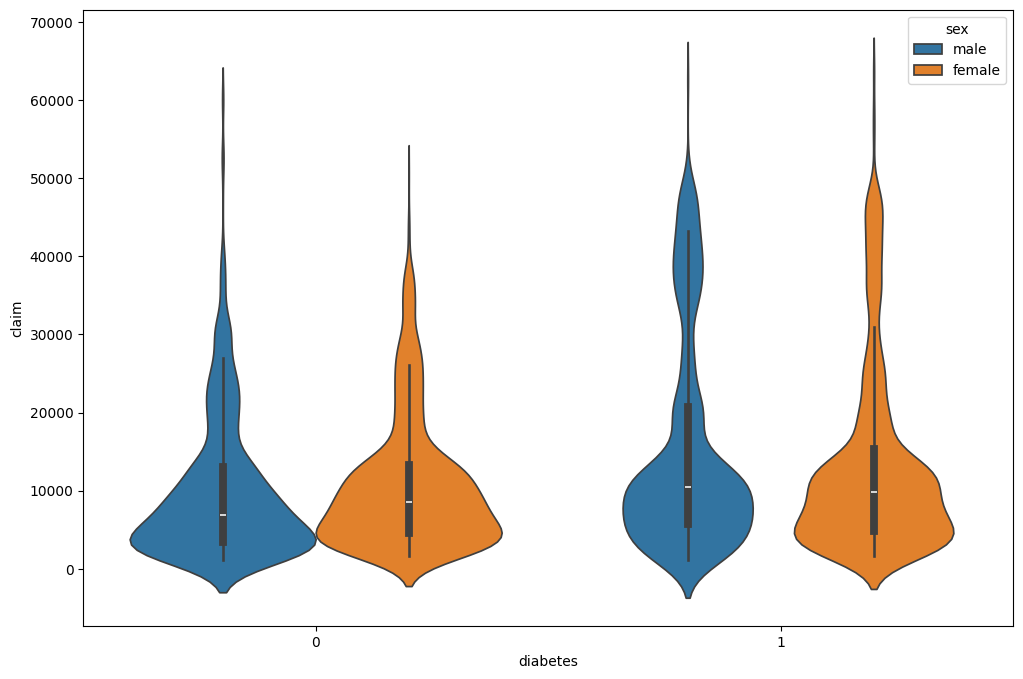

In [34]:
sns.violinplot(x='diabetes',y='claim',data=df,hue='sex')

The diabetic patients have higher insurance claims in comparison to non-diabetic patients.

## Feature Engineering

In [35]:
df.sex.replace(['female','male'],[0,1],inplace=True)
df.sex = df.sex.astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  int64  
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(7), object(3)
memory usage: 1.5+ MB


In [37]:
le = LabelEncoder()
df.city = le.fit_transform(df.city)
df.city = df.city.astype(int)
df.job_title = le.fit_transform(df.job_title)
df.job_title = df.job_title.astype(int)
df.hereditary_diseases = le.fit_transform(df.hereditary_diseases)
df.hereditary_diseases = df.hereditary_diseases.astype(int)

In [38]:
scaler = StandardScaler()
features = df.columns
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=features)
scaled_df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,1.475,1.020,-0.066,-1.007,0.215,-0.106,-0.497,0.379,0.173,-1.867,-0.537,-1.598,-0.024
1,0.703,-0.980,0.736,-1.294,0.215,-0.106,-0.497,-1.549,0.482,0.536,1.861,-0.255,-0.316
2,-0.490,-0.980,-0.066,-2.104,-2.982,0.708,2.012,0.688,0.996,0.536,1.861,-1.789,1.591
3,1.545,-0.980,-0.869,1.035,0.215,-0.106,2.012,0.727,0.173,0.536,-0.537,-0.831,2.891
4,-1.402,-0.980,-1.088,-1.632,0.215,-0.920,-0.497,-1.433,0.688,0.536,-0.537,0.320,-0.961


In [39]:
X = scaled_df.drop('claim',axis=1)
y = scaled_df.claim
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=1)

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
print("R2 Score:",lr.score(X_test,y_test))

R2 Score: 0.7441951029833078


In [42]:
lr_pred = lr.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lr_pred)))

RMSE: 0.49887652549374845


In [43]:
ard = ARDRegression()
ard.fit(X_train,y_train)

ARDRegression()

In [44]:
print("R2 Score:",ard.score(X_test,y_test))

R2 Score: 0.7441134539617895


In [45]:
ard_pred = ard.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,ard_pred)))

RMSE: 0.4989561360306031


In [46]:
huber = HuberRegressor(max_iter=200)
huber.fit(X_train,y_train)

HuberRegressor(max_iter=200)

In [47]:
print("R2 Score:",huber.score(X_test,y_test))

R2 Score: 0.7150351229868387


In [48]:
huber_pred = huber.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,huber_pred)))

RMSE: 0.5265435645571611


In [49]:
ls = Lasso(alpha=40)
ls.fit(X_train,y_train)

Lasso(alpha=40)

In [50]:
print("R2 Score:",ls.score(X_test,y_test))

R2 Score: -0.0005482058167620707


In [51]:
ls_pred = ls.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,ls_pred)))

RMSE: 0.9866375736816816


In [52]:
tw = TweedieRegressor()
tw.fit(X_train,y_train)

TweedieRegressor()

In [53]:
tw.score(X_test,y_test)

0.5932534612945686

In [54]:
tw_pred = tw.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,tw_pred)))

RMSE: 0.6290723179598251


In [55]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
print("R2 Score:",xgb.score(X_test,y_test))

R2 Score: 0.9679750400715532


In [57]:
xgb_pred = xgb.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,xgb_pred)))

RMSE: 0.17651553739211373


In [58]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [59]:
print("R2 Score:",dtree.score(X_test,y_test))

R2 Score: 0.9521157745432998


In [60]:
dtree_pred = dtree.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,dtree_pred)))

RMSE: 0.21584146258288242


In [61]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [62]:
print("R2 Score:",knr.score(X_test,y_test))

R2 Score: 0.9467417238347237


In [63]:
knr_pred = knr.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,knr_pred)))

RMSE: 0.227631413076022


In [64]:
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [65]:
print("R2 Score:",svr.score(X_test,y_test))

R2 Score: 0.8656795470101941


In [66]:
svr_pred = svr.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,svr_pred)))

RMSE: 0.36150117697505163


In [67]:
rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)

RandomForestRegressor()

In [68]:
print("R2 Score:",rfc.score(X_test,y_test))

R2 Score: 0.9713782633644173


In [69]:
rfc_pred = rfc.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,rfc_pred)))

RMSE: 0.16687321466766


## Model Performance Analysis

In [70]:
print("Performance of various ML models used:")
print('--------------------------------------')
print("Linear Regression:",str(np.round(lr.score(X_test,y_test)*100,2)) + '%')
print("ARD Regression:",str(np.round(ard.score(X_test,y_test)*100,2)) + '%')
print("Huber Regressor:",str(np.round(huber.score(X_test,y_test)*100,2)) + '%')
print("Lasso Regression:",str(np.round(ls.score(X_test,y_test)*100,2)) + '%')
print("Tweedie Regressor:",str(np.round(tw.score(X_test,y_test)*100,2)) + '%')
print("Support Vector Regressor:",str(np.round(svr.score(X_test,y_test)*100,2)) + '%')
print("K Neighbors Regressor:",str(np.round(knr.score(X_test,y_test)*100,2)) + '%')
print("Decision Tree Regressor:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("XG Boost Regressor:",str(np.round(xgb.score(X_test,y_test)*100,2)) + '%')
print("Random Forest Regressor:",str(np.round(rfc.score(X_test,y_test)*100,2)) + '%')

Performance of various ML models used:
--------------------------------------
Linear Regression: 74.42%
ARD Regression: 74.41%
Huber Regressor: 71.5%
Lasso Regression: -0.05%
Tweedie Regressor: 59.33%
Support Vector Regressor: 86.57%
K Neighbors Regressor: 94.67%
Decision Tree Regressor: 95.21%
XG Boost Regressor: 96.8%
Random Forest Regressor: 97.14%


The model with the best performance is Random Forest Regressor, having a prediction accuracy of more than 97%, which is closely followed by XG Boost Regressor possessing a predictive precision of more than 96%, Decision Tree Regressor having an accuracy of more than 95%, K Neighbors Regressor possessing an accuracy of close to 95% and Support Vector Regressor which has a predictive precision of more than 86%.

## Saving the Random Forest Regressor model for future use

In [71]:
joblib.dump(rfc,'model.pkl',compress=4)

['model.pkl']

In [72]:
model = joblib.load('model.pkl')
model

RandomForestRegressor()